In [1]:
# !pip install -qU "langchain[openai]"

In [2]:
import os
import getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"var: ")

_set_env("OPENAI_API_KEY")

In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

llm.invoke("HI!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f4ae844694', 'id': 'chatcmpl-D7i6bv1bzn9CWmmCyFmMNqaEI43TZ', 'finish_reason': 'stop', 'logprobs': None}, id='run-f812090c-1ef4-4abd-86c6-d72116205f48-0', usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [4]:
from langchain.chat_models import init_chat_model

model = init_chat_model(
    "gpt-4o-mini", 
    model_provider="openai")

model.invoke("Hi what is your model name?")

AIMessage(content="I am based on OpenAI's GPT-3 model. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 14, 'total_tokens': 33, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_842ff35899', 'id': 'chatcmpl-D7i6buvFmQAsanSnLYTGL59qh4Qsm', 'finish_reason': 'stop', 'logprobs': None}, id='run-9b8fca74-0ac8-4ca7-a383-e058c6a1503a-0', usage_metadata={'input_tokens': 14, 'output_tokens': 19, 'total_tokens': 33, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
model = init_chat_model("claude-sonnet-4-5-20250929", model_provider="anthropic")

model.invoke("Hi what is your name? Like the model name?")

AIMessage(content="I'm Claude, made by Anthropic. The specific model you're talking to is Claude 3.5 Sonnet (version 2).", additional_kwargs={}, response_metadata={'id': 'msg_012NVohA2H9Xzw1mP4cWyKw2', 'model': 'claude-sonnet-4-5-20250929', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 18, 'output_tokens': 35, 'cache_creation': {'ephemeral_5m_input_tokens': 0, 'ephemeral_1h_input_tokens': 0}, 'service_tier': 'standard', 'inference_geo': 'not_available'}, 'model_name': 'claude-sonnet-4-5-20250929'}, id='run-99515dde-c990-49f5-a46a-a41741f05d46-0', usage_metadata={'input_tokens': 18, 'output_tokens': 35, 'total_tokens': 53, 'input_token_details': {'cache_read': 0, 'cache_creation': 0}})

# Full LLM App in LangChain

In [7]:
import getpass
import os

try:
    # load environment variables from .env file (requires `python-dotenv`)
    from dotenv import load_dotenv

    load_dotenv()
except ImportError:
    pass

os.environ["LANGSMITH_TRACING"] = "true"
if "LANGSMITH_API_KEY" not in os.environ:
    os.environ["LANGSMITH_API_KEY"] = getpass.getpass(
        prompt="Enter your LangSmith API key (optional): "
    )
if "LANGSMITH_PROJECT" not in os.environ:
    os.environ["LANGSMITH_PROJECT"] = getpass.getpass(
        prompt='Enter your LangSmith Project Name (default = "default"): '
    )
    if not os.environ.get("LANGSMITH_PROJECT"):
        os.environ["LANGSMITH_PROJECT"] = "default"
if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass(
        prompt="Enter your OpenAI API key (required if using OpenAI): "
    )

In [5]:
from langchain.chat_models import init_chat_model

model = init_chat_model(
    "gpt-5-mini",
    model_provider="openai"
)

model.invoke("Hi")

AIMessage(content='Hi — how can I help you today? \n\nHere are a few things I can do if you want suggestions:\n- Answer questions or explain something\n- Help with writing (emails, essays, code, etc.)\n- Generate ideas (projects, meal plans, travel)\n- Troubleshoot tech problems\n- Summarize or translate text\n\nOr just tell me what you need.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 7, 'total_tokens': 92, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-mini-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D7iCIapavgrDmuyaIy7qSj9mhIgkz', 'finish_reason': 'stop', 'logprobs': None}, id='run-c5ada134-2b14-48ac-a2df-91a8c355a3a6-0', usage_metadata={'input_tokens': 7, 'output_tokens': 85, 'total_tokens': 92, 'input_token_details': {'a

In [9]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("Translate the following from English into Italian"),
    HumanMessage("Hi! Let's learn about large language models!"),
]

model.invoke(messages)

AIMessage(content='Ciao! Impariamo a conoscere i grandi modelli di linguaggio!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 153, 'prompt_tokens': 26, 'total_tokens': 179, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-mini-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D7i7mMFHHnUxB9XalGCLgJ0Nm4P1h', 'finish_reason': 'stop', 'logprobs': None}, id='run-67878eb7-df5d-4013-a97b-731676f3091d-0', usage_metadata={'input_tokens': 26, 'output_tokens': 153, 'total_tokens': 179, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 128}})

In [10]:
model.invoke([{"role": "user", "content": "How are ya?"}])

AIMessage(content="I'm good — thanks for asking! How are you? Anything I can help you with today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 10, 'total_tokens': 38, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-mini-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D7i7pC5DS2cm6A6qyXbfzuvxPIKsJ', 'finish_reason': 'stop', 'logprobs': None}, id='run-5789fa39-804c-4286-a6f4-83fd034844e8-0', usage_metadata={'input_tokens': 10, 'output_tokens': 28, 'total_tokens': 38, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [11]:
for token in model.stream("Tell me the 3 funniest jokes you know"):
    print(token.content, end="|")

|Here| are| three| funny| ones|:

|1|)| I| told| my| wife| she| was| drawing| her| eyebrows| too| high|.| She| looked| surprised|.

|2|)| Two| antennas| met| on| a| roof|,| fell| in| love| and| got| married|.| The| ceremony| wasn|’t| much|,| but| the| reception| was| excellent|.

|3|)| Why| don|’t| scientists| trust| atoms|?| Because| they| make| up| everything|.||

In [12]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "Translate the following from {language_source} into {language_target}"

prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("human", "{input_sentence}")]
)

prompt_template.format(language_source="English", language_target="French", input_sentence="I love programming in Python")

'System: Translate the following from English into French\nHuman: I love programming in Python'

In [13]:
prompt = prompt_template.invoke({"language_source": "English", "language_target": "French", "input_sentence": "I love programming in Python"})
response = model.invoke(prompt)
response

AIMessage(content="J'aime programmer en Python.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 22, 'total_tokens': 101, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 64, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-mini-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D7i83ZXAwKZSwWjT0D0nNs5pQHHCq', 'finish_reason': 'stop', 'logprobs': None}, id='run-7c8e0a9a-8bb7-4ffa-8824-e95205de461e-0', usage_metadata={'input_tokens': 22, 'output_tokens': 79, 'total_tokens': 101, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 64}})

In [14]:
response.content

"J'aime programmer en Python."

In [15]:
chain = prompt_template | model

response = chain.invoke({"language_source": "English", "language_target": "Italian", "input_sentence": "Lucas is a gorgeous bald teacher."})

In [16]:
response.content

'Lucas è un insegnante calvo e bellissimo.'

# Structured Outputs

In [1]:
from pydantic import BaseModel, Field
from openai import OpenAI

class ElementsOfLiveCourse(BaseModel):
    title: str = Field(description="The title of the live course")
    topic: str = Field(description="The core topic of the live course")
    example_lesson: str = Field(description="An example lesson from the live course")

with open("./course_example.md", "r") as f:
    prompt_raw_course = f.read()

client = OpenAI()

response = client.beta.chat.completions.parse(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You take in raw information for a course and\
            you output the structured objects with information about that course"},
        {"role": "user", "content": prompt_raw_course}
    ],
    response_format=ElementsOfLiveCourse
)

response

ParsedChatCompletion[ElementsOfLiveCourse](id='chatcmpl-D7iBbeKZrWhNGfTsJDNLydsSwddRB', choices=[ParsedChoice[ElementsOfLiveCourse](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[ElementsOfLiveCourse](content='{"title":"Introduction to AI and Large Language Models","topic":"Understanding fundamental concepts behind Artificial Intelligence and the use of large language models","example_lesson":"1 - Creating Simple Prompts with Python: In this lesson, you\'ll learn how to interact with a language model by writing prompts in Python."}', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None, parsed=ElementsOfLiveCourse(title='Introduction to AI and Large Language Models', topic='Understanding fundamental concepts behind Artificial Intelligence and the use of large language models', example_lesson="1 - Creating Simple Prompts with Python: In this lesson, you'll learn how to interact with a language model by writing

In [2]:
response.choices[0].message.parsed

ElementsOfLiveCourse(title='Introduction to AI and Large Language Models', topic='Understanding fundamental concepts behind Artificial Intelligence and the use of large language models', example_lesson="1 - Creating Simple Prompts with Python: In this lesson, you'll learn how to interact with a language model by writing prompts in Python.")

In [3]:
from IPython.display import Markdown

str_output = f"""
# {response.choices[0].message.parsed.title}

- *Topic*: {response.choices[0].message.parsed.topic}
- *Example Lesson*: {response.choices[0].message.parsed.example_lesson}
"""
Markdown(str_output)


# Introduction to AI and Large Language Models

- *Topic*: Understanding fundamental concepts behind Artificial Intelligence and the use of large language models
- *Example Lesson*: 1 - Creating Simple Prompts with Python: In this lesson, you'll learn how to interact with a language model by writing prompts in Python.


In [6]:
llm = init_chat_model("gpt-5-mini", model_provider="openai")

llm.invoke("What are the elements of a Screenplay?")

AIMessage(content='A screenplay has two kinds of elements: the technical/formatting elements that make it readable and industry-standard, and the dramatic/structural elements that make it a good story. Below is a concise guide to both.\n\nTechnical / Format elements\n- Slugline (Scene Heading): INT./EXT. LOCATION — DAY/NIGHT. Marks new scenes, location and time.\n  Example: INT. DINER — DAY\n- Action / Description: Present-tense, visual description of what can be seen and heard. Keep it short, cinematic.\n  Example: A waitress pours coffee. The bell above the door jingles.\n- Character Name: Centered, capitalized, above dialogue to indicate who speaks.\n- Dialogue: The spoken lines beneath the character name.\n- Parenthetical (Wrylie): Brief direction for how a line is delivered (use sparingly).\n  Example: (whispering)\n- Dialogue Extensions: V.O. (voice-over), O.S. (off-screen) placed next to character name to show source of dialogue.\n  Example: NARRATOR (V.O.)\n- Transitions: CUT T

## Pydantic Class

In [7]:
from typing import Optional
from pydantic import BaseModel, Field


# Pydantic
class ElementsOfScreenplay(BaseModel):
    """Elements of a Screenplay."""
    
    title: str = Field(description="The title of the screenplay")
    genre: str = Field(description="The genre of the screenplay")
    protagonist: str = Field(description="The protagonist of the screenplay")
    antagonist: str = Field(description="The antagonist of the screenplay")
    setting: str = Field(description="The setting of the screenplay")
    plot: str = Field(description="The plot of the screenplay")


structured_llm = llm.with_structured_output(ElementsOfScreenplay)

screenplay_structured = structured_llm.invoke("Structure a Screenplay about characters afraid of becoming outdated.")

In [8]:
from IPython.display import Markdown

str_output = f"""
# {screenplay_structured.title}

- *Genre*: {screenplay_structured.genre}
- *Protagonist*: {screenplay_structured.protagonist}
- *Antagonist*
- *Setting*: {screenplay_structured.setting}

### Plot

{screenplay_structured.plot}
"""
Markdown(str_output)


# Update Pending

- *Genre*: Dramedy (near-future, character-driven)
- *Protagonist*: Maya Alvarez — 45, creative director of a once-trendsetting lifestyle design studio, resourceful but terrified of being irrelevant
- *Antagonist*
- *Setting*: A near-future metropolis where cultural attention is governed by an omnipresent recommendation algorithm; scenes alternate between the fading, sunlit offices of Maya's design studio, the electric public spaces where trends are birthed, and intimate domestic spaces showing the personal cost of professional fear

### Plot

Act I — Setup: Maya Alvarez runs Lumen Atelier, a boutique design studio that defined a decade's aesthetic. A platform update — an algorithmic recommender — buries their content in favor of hyper-niche 'microtrends' seeded by young influencers. Clients demand instant pivots; staff morale drops. Inciting incident: a flagship client cancels a major campaign, citing platform metrics. Maya's panic about becoming "outdated" intensifies; she begins compulsively chasing the algorithm's signals. She meets Nova Chen, an exuberant influencer who embodies everything Maya fears: speed, disposability, and viral mastery. Nova is the public face of the Algorithm's tastes, friendly but ruthless. Act II — Confrontation: Maya attempts to retrofit Lumen's work to chase trends — reactionary color shifts, contrived hashtags, staged authenticity. The team fractures: younger designers embrace the pivot, older craftsmen resist. Maya's personal life frays; she lies to her partner about their dwindling savings and misses her teenage son's recital. A mid-point failure: Maya greenlights a stunt meant to force viral attention; it backfires, producing a shallow hit that alienates long-time collaborators and draws public backlash for selling out. Humiliated, she retreats and encounters a small, intergenerational group called the Archive Collective — makers, librarians, and slow-content creators who deliberately curate durability over virality. Through them, Maya rediscovers principles: craft, context, and audience trust. She also recognizes that fear, not age, drove her decisions. Meanwhile, Nova and the Algorithm tighten their hold: the platform downgrades Lumen further unless Maya produces algorithm-friendly content. Act III — Resolution: At a pitch that will decide the studio's future, Maya must choose between a formulaic, data-chasing campaign backed by Nova's platform clout or a risky, human-centered project that honors the studio's voice while using new tools with restraint. Maya devises a hybrid plan — a layered campaign that uses the platform's mechanics honestly (targeting niche communities, transparent process films, collaborations with older makers) rather than pandering. Nova initially opposes it, but the campaign's authenticity resonates with a cross-generational audience and sparks a slower, steadier wave of engagement that the algorithm can't easily quantify or replicate. Climax: a live-streamed reveal where Maya speaks candidly about craft, obsolescence, and care; some metrics lag, but community support leads to baseline stability and a new client committed to genuine storytelling. Denouement: Lumen Atelier survives in a reshaped form — smaller, steadier, and more principled. Maya accepts that trends will pass but that obsolescence is not a moral failing; she mentors younger creators, including Nova in a tentative collaboration, and builds systems that let her studio iterate without losing identity. The antagonist (the Algorithm/Nova) remains part of the ecosystem — neither villain nor ally — forcing continuous adaptation. Themes: fear of irrelevance, the ethics of attention economies, intergenerational exchange, the creative value of slowness and authenticity versus the seductive safety of chasing metrics.


# Model + Tools

In [11]:
from langchain_community.tools.tavily_search import TavilySearchResults

model = init_chat_model("gpt-5-mini", model_provider="openai")
search = TavilySearchResults(max_results=2)
tools = [search]

model_with_tools = model.bind_tools(tools)

output_model_tools = model_with_tools.invoke("What is the latest model released by Anthropic?")

In [12]:
output_model_tools.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': "Anthropic latest model released 2026 'Anthropic' 'release' 'model' 'latest'"},
  'id': 'call_WBMsSvqahMmreUVtZhbn6Gn4',
  'type': 'tool_call'},
 {'name': 'tavily_search_results_json',
  'args': {'query': "Anthropic releases 'Claude' 2025 2026 'Claude 3' 'Claude 4' 'latest model'"},
  'id': 'call_tVZyS7X7xWvarLazU878tKb8',
  'type': 'tool_call'},
 {'name': 'tavily_search_results_json',
  'args': {'query': "What is the newest Anthropic model released 'Claude 2026' 'Anthropic Claude' 'latest release'"},
  'id': 'call_RrChnhULMfGmaxcC3CiY93rf',
  'type': 'tool_call'}]

The output we get here is something called a "tool call" which means, prepared arguments for a pre-defined function (in this case
web search with the tavily API) to gather the required information.

Now let's look at a full agent.

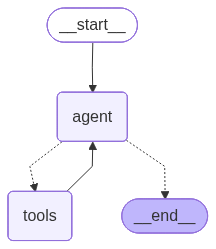

In [13]:
# Import relevant functionality
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

# Create the agent
memory = MemorySaver()
model = init_chat_model("gpt-4o-mini", model_provider="openai")
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(model, tools, checkpointer=memory)

agent_executor

Agent Executor is a graph!

In [14]:
# We pass config because this agent has memory so we need to pass a thread_id
config = {"configurable": {"thread_id": "abc123"}}
# Below we can't just invoke on "input" we use "messages" because the agent expects a list of messages (this info is hidden in the create_react_agent function)
agent_executor.invoke({"messages": [HumanMessage("What is the capital of Brazil?")]}, config=config)

{'messages': [HumanMessage(content='What is the capital of Brazil?', additional_kwargs={}, response_metadata={}, id='760f18c2-8c3f-4a20-be2e-3192318fad11'),
  AIMessage(content='The capital of Brazil is Brasília.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 86, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f4ae844694', 'id': 'chatcmpl-D7iEef37n2T07qMYiCX8NH6Tlrie9', 'finish_reason': 'stop', 'logprobs': None}, id='run-21494394-c096-4526-951c-ceb91661857c-0', usage_metadata={'input_tokens': 86, 'output_tokens': 8, 'total_tokens': 94, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [16]:
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="What are the best LLM models right now according to artificialanalysis.ai")]},
    stream_mode="values",
    config=config
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What are the best LLM models right now according to artificialanalysis.ai
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_pyaedO1RtAyLKQfnY0rxBYd8)
 Call ID: call_pyaedO1RtAyLKQfnY0rxBYd8
  Args:
    query: best LLM models site:artificialanalysis.ai
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Multilingual AI Model Benchmark - Compare Leading LLMs by ...", "url": "https://artificialanalysis.ai/models/multilingual", "content": "Stay connected with us on X, Discord, and LinkedIn to stay up to date with future analysis\n\nArtificial Analysis\n\nFor EnterpriseInsights\n\n# Multilingual AI Model BenchmarkCompare Leading LLMs by Language\n\nLast updated:February 10, 2026\n\n## Top models 🌐All (average)\n\nGemini 3 Pro Preview (high)\n\nClaude Opus 4.6 

In [20]:
# !pip install langchain-ollama

from langchain.chat_models import init_chat_model

local_llm = init_chat_model("mistral-small3.2", model_provider="ollama")

local_llm.invoke("What are some predictions for AI in 2026?")

AIMessage(content='Predicting the exact advancements in AI by 2026 involves some speculation, but based on current trends and ongoing research, here are some plausible predictions:\n\n1. **Advanced Natural Language Understanding**: AI models will likely achieve a deeper understanding of context, nuances, and even sarcasm in human language, making interactions more natural and human-like.\n\n2. **Multimodal AI**: AI systems will become proficient in processing and integrating information from multiple sources, such as text, images, audio, and video, simultaneously. This could lead to more comprehensive and context-aware applications.\n\n3. **Autonomous AI Systems**: AI will likely become more autonomous, capable of making complex decisions with minimal human intervention. This could revolutionize industries like healthcare, finance, and transportation.\n\n4. **Explainable AI (XAI)**: There will be a greater emphasis on making AI decisions understandable to humans. This is crucial for fi

In [22]:
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(local_llm, tools)

In [23]:
agent_executor.invoke({"messages": [HumanMessage("What are some predictions for AI in 2026?")]})

{'messages': [HumanMessage(content='What are some predictions for AI in 2026?', additional_kwargs={}, response_metadata={}, id='28c66ffd-81c6-4410-88ba-eb80c36e6c43'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'mistral-small3.2', 'created_at': '2026-02-10T13:40:56.942107Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1637365417, 'load_duration': 93025459, 'prompt_eval_count': 605, 'prompt_eval_duration': 605318792, 'eval_count': 24, 'eval_duration': 931826791, 'model_name': 'mistral-small3.2'}, id='run-ba4b9150-de63-4c21-875c-a62abb6829c5-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'predictions for AI in 2026'}, 'id': 'f5cd13a0-f69c-45b8-91c7-ace3414eaae1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 605, 'output_tokens': 24, 'total_tokens': 629}),
  ToolMessage(content='[{"title": "18 Predictions for 2026 - UX Tigers", "url": "https://www.uxtigers.com/post/2026-predictions", "content": "What unites thes